# Project: Factors associated with patients showing up for a scheduled appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project seeks to analyse the no show appointment dataset. The project seeks to investigate factors associated with patients honouring their scheduled appointment or not. 

Project question: What is the relationship between the age, gender, diabetes status, and receipt of sms with patients showing up or not showing up for their scheduled appointment?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Import dataset
df = pd.read_csv("data/noshowappointments.csv")

# The first five rows in the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
f"The dataset has {df.shape[0]} observations and {df.shape[1]} variables"

'The dataset has 110527 observations and 14 variables'

In [5]:
df.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 14 variables with no missing data. Patient id is represented as a float data type. Appointment id, age, scholarship, hypertension, diabetes, alcoholism, handcap, sms received are represented as integer data types. Gender, scheduled day, appointment day, neighbourhood, and no show are represented as object data types.

In [6]:
df.duplicated().sum() #Check for duplicates

0

There are no duplicates in the dataset

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The describe function produces summary statistics for the above variables. However, only the summary for age is intuitive. The other variables have wrong data types and with conversion will help to solve the presentation of the summary statistics. Age has a minimum age of -1 which is not likely. This will be solved at the next section.

### Data Cleaning (Drop columns, Convert data types into appropriate types, clean column names)

In [8]:
# Drop columns that are not essential for the project question: patient id, appointment id, schedule day, appointment day, scholarship, hypertension, handicap and neigbourhood

df.drop(["PatientId", "AppointmentID","ScheduledDay", "Neighbourhood","AppointmentDay","Scholarship","Hipertension","Alcoholism","Handcap"], axis=1, inplace=True)

# Inspect first five rows
df.head()

,Gender,Age,Diabetes,SMS_received,No-show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,1,0,No


In [9]:
# Datatypes of variables
df.dtypes

Gender          object
Age              int64
Diabetes         int64
SMS_received     int64
No-show         object
dtype: object

SMS received and diabetes from the dataset appears as integer datatypes instead of object datatypes. The code below assesses the unique values in the SMS variable and diabetes variable.

In [10]:
print(df.SMS_received.unique()) #Unique values in the SMS dataset
df.Diabetes.unique() # Unique values in diabetes

[0 1]


array([0, 1], dtype=int64)

In [11]:
df["SMS_received"]= df.SMS_received.astype(object) # Convert the SMS data type to an object

In [12]:
df["Diabetes"]= df.Diabetes.astype(object) # Convert diabetes data type to an object

In [13]:
# Convert variable names to lower case for consistency and hyphens for underscores
df.columns = df.columns.str.lower().str.replace("-","_")
df.head() # Inspect first five rows

,gender,age,diabetes,sms_received,no_show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,1,0,No


In [14]:
drop_age = df["age"] >= 1 # Masking to drop age reported as 0 and less than 0
df = df[drop_age] # Drop individuals with age less or equal to 0
df.head() # View first five rows

,gender,age,diabetes,sms_received,no_show
0,F,62,0,0,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,1,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the relationship between gender and patient appointment?)

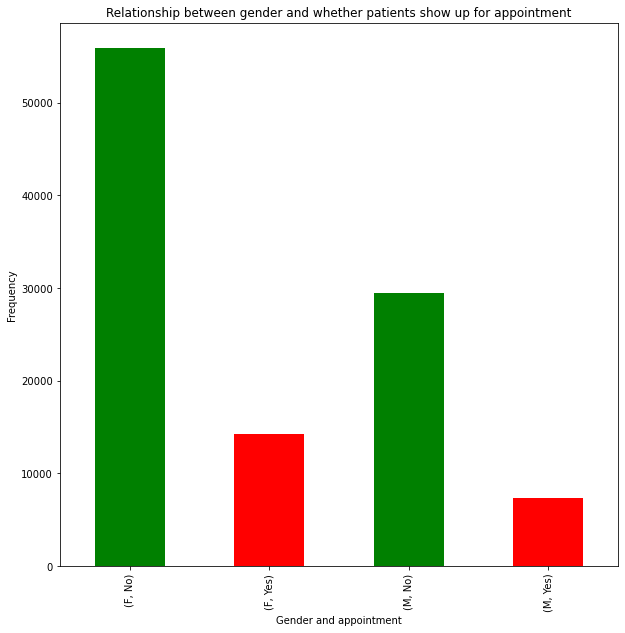

In [15]:
df.groupby("gender")["no_show"].value_counts().plot(kind="bar", figsize=(10,10),color=["green","red"]);
plt.xlabel("Gender and appointment")
plt.ylabel("Frequency")
plt.title("Relationship between gender and whether patients show up for appointment");

##NB: No means patient showed up for the appointment and yes means the patient did not show up for the appointment.

In [16]:
df["gender"].value_counts()

F    70118
M    36869
Name: gender, dtype: int64

From the above bar chart, more females showed up for their appointment compared to males. However, there are more females in the dataset compared to males. This may have influenced the result shown above. As such, a bar chart chart will be plotted using the proportions of males and females to explore this relationship further.

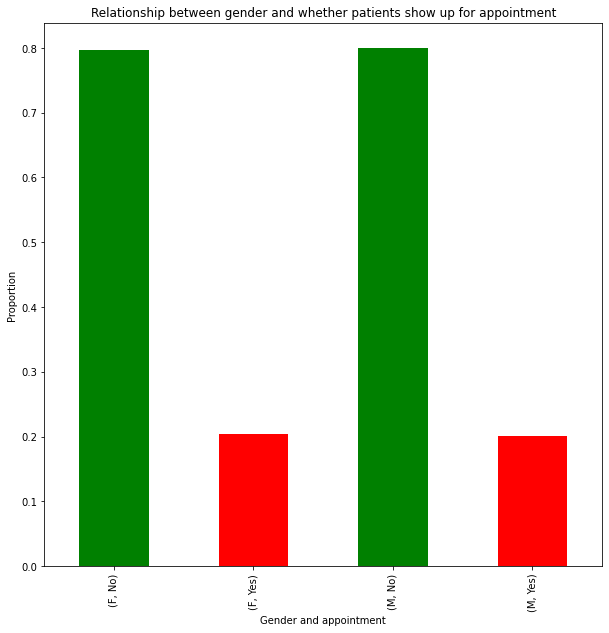

In [17]:
df.groupby("gender")["no_show"].value_counts(normalize=True).plot(kind="bar", figsize=(10,10), color=["green","red"]);
plt.xlabel("Gender and appointment")
plt.ylabel("Proportion")
plt.title("Relationship between gender and whether patients show up for appointment");

The proportions show that gender did not have any association with whether patient showed up for their appointment or not. Males and females have similar likelihood of showing up or not showing up for scheduled appointments.

### Research Question 2  (What is the relationship between patient receiving sms and showing up for appointment?)

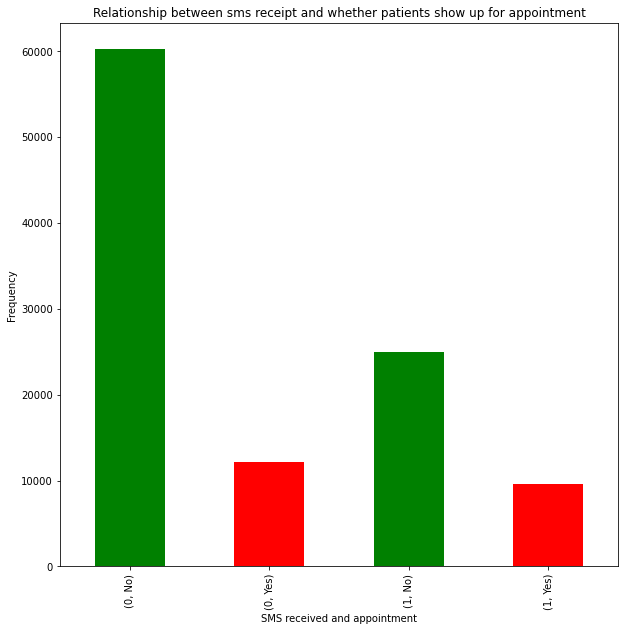

In [18]:
df.groupby("sms_received")["no_show"].value_counts().plot(kind="bar", figsize=(10,10),color=["green","red"]);
plt.xlabel("SMS received and appointment")
plt.ylabel("Frequency")
plt.title("Relationship between sms receipt and whether patients show up for appointment");

From the above visualisation, patients who did not receive sms alert showed up for the appointment compared to patients who did receive an sms alert. However the frequency of patient who did not receive sms alert were more than patients who received sms alert. As such, proportions will be plotted to investigate this relationship further.

In [19]:
df["sms_received"].value_counts()

0    72402
1    34585
Name: sms_received, dtype: int64

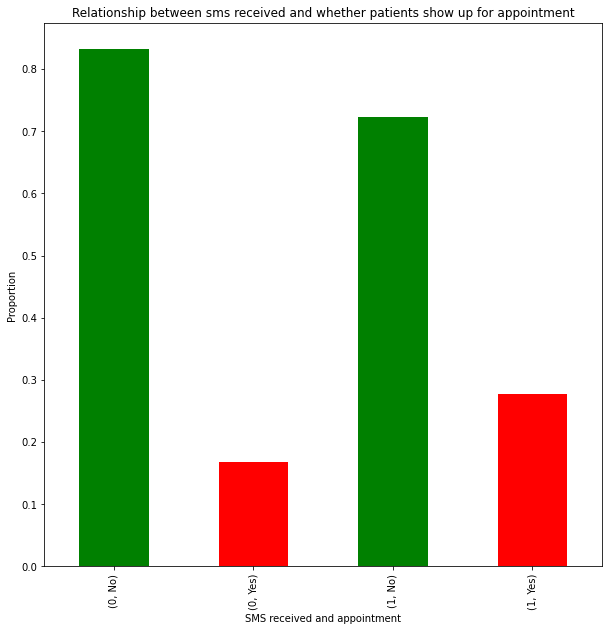

In [20]:
df.groupby("sms_received")["no_show"].value_counts(normalize=True).plot(kind="bar", figsize=(10,10), color=["green","red"]);
plt.xlabel("SMS received and appointment")
plt.ylabel("Proportion")
plt.title("Relationship between sms received and whether patients show up for appointment");

Similar to the plot above using frequencies, receiving sms alert did not make patient show up for appointments. More patients who received sms alert did not show up for their appointments compared to patients who did not receive sms alerts.

### Research Question 3 (Does having diabetes make patient show up for appointment?)

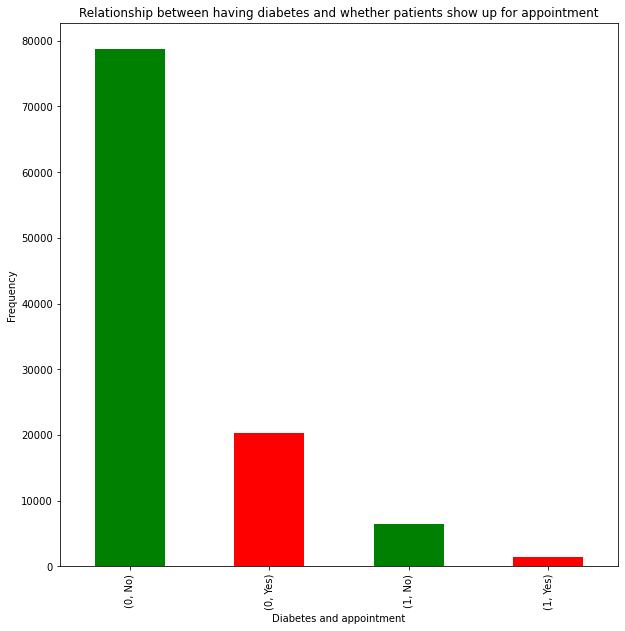

In [21]:
df.groupby("diabetes")["no_show"].value_counts().plot(kind="bar", figsize=(10,10),color=["green","red"]);
plt.xlabel("Diabetes and appointment")
plt.ylabel("Frequency")
plt.title("Relationship between having diabetes and whether patients show up for appointment");

From the above plot, patient with diabetes were less likely to show up or not show up for appointments compared with patients with diabetes. However, the frequency below shows that patients without diabetes were greater in number that patients with diabetes. As such, plottting the proportions may show an informative visualisation.

In [22]:
df["diabetes"].value_counts()

0    99044
1     7943
Name: diabetes, dtype: int64

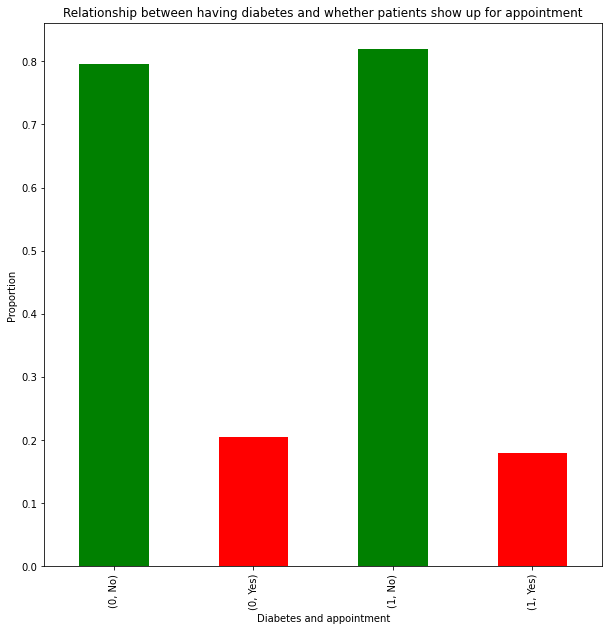

In [23]:
df.groupby("diabetes")["no_show"].value_counts(normalize=True).plot(kind="bar", figsize=(10,10), color=["green","red"]);
plt.xlabel("Diabetes and appointment")
plt.ylabel("Proportion")
plt.title("Relationship between having diabetes and whether patients show up for appointment");

The visualisation above interesting shows that the a greater proportion of patients with diabetes show up for appointments compared with patients without diabetes. Additionally, patients with diabetes had a lesser proportion of patients not showing for an appointment.

In [24]:
df.groupby("diabetes")["age"].mean()

diabetes
0    36.467035
1    61.372529
Name: age, dtype: float64

In [25]:
df.groupby("sms_received")["age"].mean()

sms_received
0    38.234552
1    38.486772
Name: age, dtype: float64

In [26]:
df.groupby("gender")["age"].mean()

gender
F    39.849183
M    35.400418
Name: age, dtype: float64

The above information shows that patient with diabetes were older than patients without diabetes. This was similar for patients who did receive an sms alert and female patients. This leads us to a fourth question.

### Research Question 4 (Did age play a role in patient showing up for appointments?)

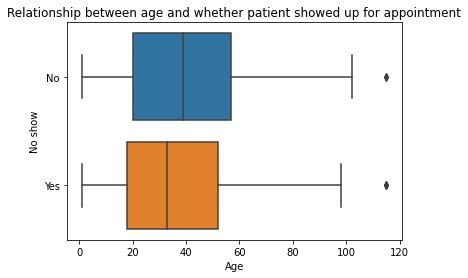

In [27]:
sns.boxplot(x="age",y="no_show",data=df);
plt.xlabel("Age")
plt.ylabel("No show")
plt.title("Relationship between age and whether patient showed up for appointment");

From the boxplot above, patient who showed for appointments were on average older than patient who did not show up for appointment. Numeric data is shown below.

In [28]:
df.groupby("no_show")["age"].median() #Median was used an not mean because the age variable is skewed as shown in the histogram below

no_show
No     39.0
Yes    33.0
Name: age, dtype: float64

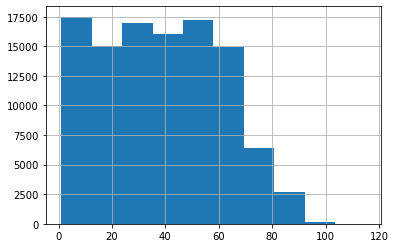

In [29]:
df["age"].hist();

<a id='conclusions'></a>
## Conclusions

In conclusion, gender and receiving sms alert did not seem to correlate with whether patient showed up for appointments or not. However, older patients on average and patients living with diabetes showed up for appointments in greater proportions compared to their controls. This notwithstanding, the findings from this study does not inferr the significance of these relationships and as such conclusions reached may be subject to change with additional statistical test of inferences.